In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()


In [6]:
disney=pd.read_csv(r"C:\Users\Aashi\Downloads\disney_plus_titles.csv")
disney.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,A Spark Story,"Jason Sterman, Leanne Dare","Apthon Corbin, Louis Gonzales",NaN,"September 24, 2021",2021,TV-PG,88 min,Documentary,Two Pixar filmmakers strive to bring their uni...
1,s2,Movie,Spooky Buddies,Robert Vince,"Tucker Albrizzi, Diedrich Bader, Ameko Eks Mas...","United States, Canada","September 24, 2021",2011,G,93 min,"Comedy, Fantasy, Kids",The puppies go on a spooky adventure through a...
2,s3,Movie,The Fault in Our Stars,Josh Boone,"Shailene Woodley, Ansel Elgort, Laura Dern, Sa...",United States,"September 24, 2021",2014,PG-13,127 min,"Coming of Age, Drama, Romance",Hazel and Gus share a love that sweeps them on...
3,s4,TV Show,Dog: Impossible,NaN,Matt Beisner,United States,"September 22, 2021",2019,TV-PG,2 Seasons,"Animals & Nature, Docuseries, Family",Matt Beisner uses unique approaches to modifyi...
4,s5,TV Show,Spidey And His Amazing Friends,NaN,"Benjamin Valic, Lily Sanfelippo, Jakari Fraser...",United States,"September 22, 2021",2021,TV-Y,1 Season,"Action-Adventure, Animation, Kids",Spidey teams up with pals to become The Spidey...


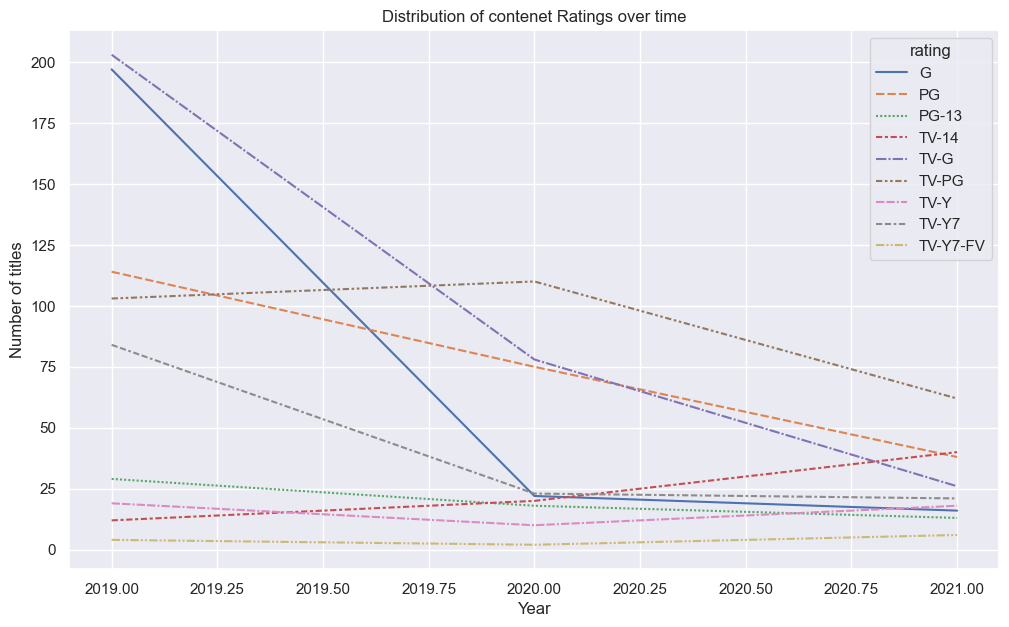

In [8]:
# 1. distribution of content ratings over time
disney['date_added']=pd.to_datetime(disney['date_added'])
rating= disney.groupby([disney['date_added'].dt.year,'rating']).size().unstack().fillna(0)
plt.figure(figsize=(12,7))
sns.lineplot(data=rating)
plt.title('Distribution of contenet Ratings over time')
plt.xlabel('Year')
plt.ylabel('Number of titles')
plt.show()

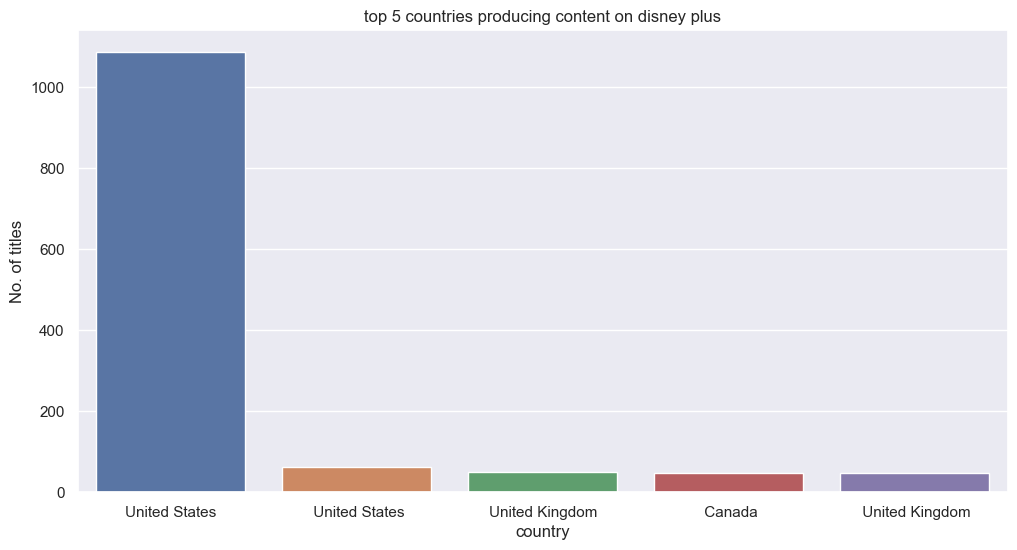

In [9]:
# 2. content production by coountry and genre
country= disney['country'].str.split(',').explode().value_counts()
plt.figure(figsize=(12,6))
sns.barplot(x=country.head(5).index,y=country.head(5).values,hue=country.head(5).index,dodge=False)
plt.legend([],[],frameon=False)
plt.title('top 5 countries producing content on disney plus')
plt.xlabel('country')
plt.ylabel('No. of titles')
plt.show()

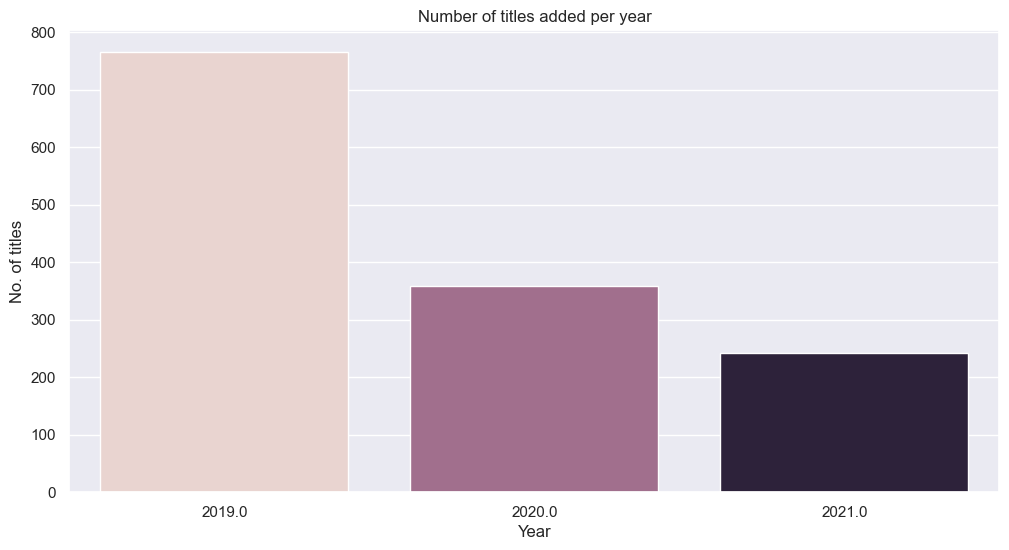

In [11]:
#3 Number of new titles added per year 
titles=disney['date_added'].dt.year.value_counts().sort_index()
plt.figure(figsize=(12,6))
sns.barplot(x=titles.index,y=titles.values,hue=titles.index,dodge=False)
plt.legend([],[],frameon=False)
plt.title('Number of titles added per year')
plt.xlabel('Year')
plt.ylabel('No. of titles')
plt.show()

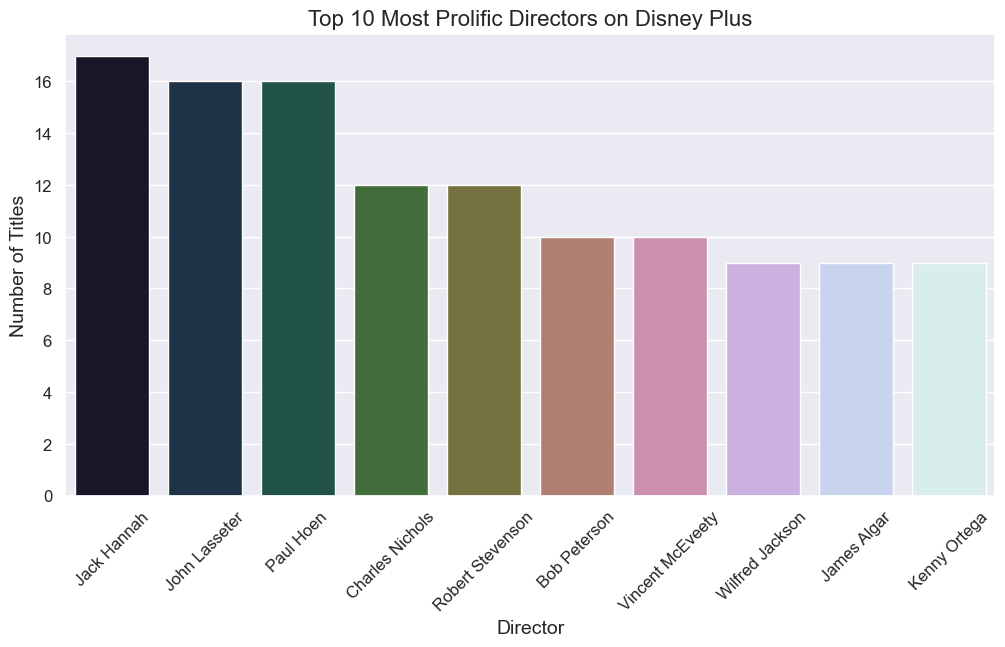

In [13]:
#4. Most Profolic directors

director = disney['director'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=director.index, y=director.values, hue=director.index, palette="cubehelix", dodge=False)
plt.legend([],[], frameon=False)
plt.title('Top 10 Most Prolific Directors on Disney Plus', fontsize=16)
plt.xlabel('Director', fontsize=14)
plt.ylabel('Number of Titles', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

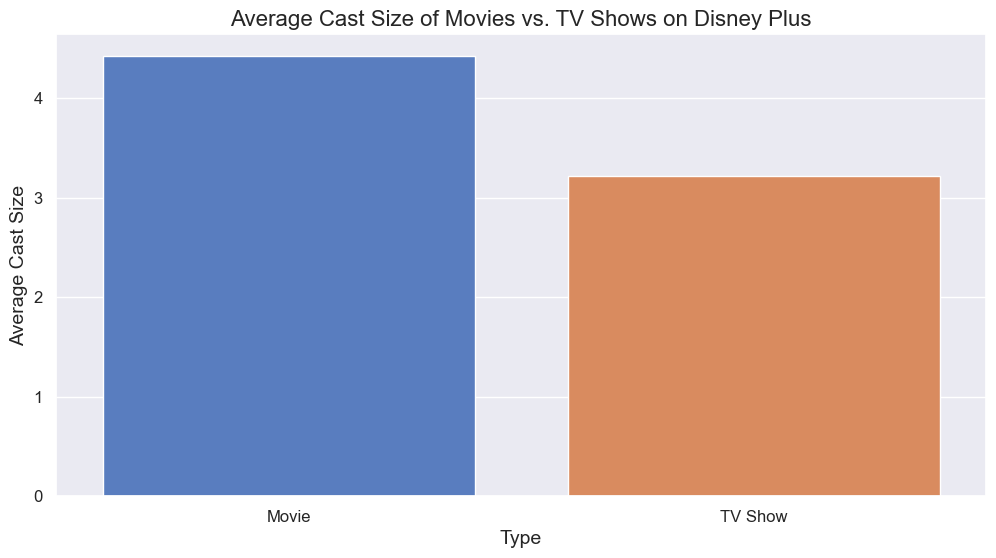

In [14]:
# 5. Cast size for movies vs. TV shows
disney['cast_size'] = disney['cast'].apply(lambda x: len(x.split(', ')) if pd.notnull(x) else 0)
cast_size_distribution = disney.groupby('type')['cast_size'].mean()

plt.figure(figsize=(12, 6))
sns.barplot(x=cast_size_distribution.index, y=cast_size_distribution.values, hue=cast_size_distribution.index, palette="muted", dodge=False)
plt.legend([],[], frameon=False)
plt.title('Average Cast Size of Movies vs. TV Shows on Disney Plus', fontsize=16)
plt.xlabel('Type', fontsize=14)
plt.ylabel('Average Cast Size', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()